# **Digit Recognizer with tf.keras**

# **Table of Contents** ✨

1. [**Introduction**](#1-introduction)  
   - [**Overview**](#overview)  
   - [**Objectives**](#objectives)  

2. [**Data preparation**](#2-data-preparation) 
   - [**Loading the libraries**](#loading-the-libraries) 
   - [**Loading the data**](#loading-the-data)  
   - [**Data exploration**](#data-exploration)  
   - [**Data preprocessing**](#data-preprocessing)  

3. [**Model development**](#3-model-development)  
   - [**Model architecture**](#model-architecture)  
   - [**Model training**](#model-training)  
   - [**Model evaluation**](#model-evaluation)
   - [**Use the trained model**](#use-the-trained-model)  

4. [**Results**](#4-results)  
   - [**Performance metrics**](#performance-metrics)  
   - [**Confusion matrix**](#confusion-matrix)  
   - [**Accuracy and loss curves**](#accuracy-and-loss-curves)  

5. [**Conclusion**](#5-conclusion)  
   - [**Summary of findings**](#summary-of-findings)  
   - [**Future work**](#future-work)  
   - [**Acknowledgments**](#acknowledgments)  

# **1. Introduction** ✨

## **Overview**

This notebook is the culmination of my fourth project in the Data Analytics bootcamp. I want to extend special thanks to my amazing teammates, [Tatiana-ZC](#) and [Noor](#), for being an integral part of this journey. Collaborating with you both has been an enriching experience, and I’ve learned so much from you 👩‍💻 💖 . 

## **Objectives**

The primary goal of this project is to train a neural network model to accurately classify digits from a vast dataset of handwritten images, known as the MNIST dataset. We chose to leverage `tf.keras`, a powerful and user-friendly high-level API within TensorFlow, to build and train our model effectively.

# **2. Data preparation** ✨

## **Loading the libraries**
IIn this section, we import all the necessary Python libraries that will be used throughout the project.

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import graphviz

# TensorFlow and Keras Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, LeakyReLU, ReLU, Flatten, BatchNormalization
from tensorflow.keras.activations import relu, sigmoid, softmax
from tensorflow.keras.utils import img_to_array, load_img

# Keras CV (Computer Vision)
import keras_cv

# Scikit-Learn Libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

2024-08-13 18:16:08.150110: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Volumes/MacintoshHD/Users/veronicalarroy/Desktop/anaconda3/envs/IH_BCN_DAFT/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## **Loading the Data**

### **Importing the Digit Recognizer Dataset from MNIST**

In this section, we'll load the dataset that is central to our project: the Digit Recognizer dataset provided by the MNIST (Modified National Institute of Standards and Technology). This dataset is a widely recognized benchmark in the field of computer vision and serves as the "hello world" for image classification tasks.

The dataset includes:

- **train.csv**: A file containing thousands of gray-scale images of hand-drawn digits, labeled from zero to nine. Each row in this file represents an image and its corresponding digit label.
- **test.csv**: A file with similar gray-scale images, but without labels. This data will be used to evaluate the performance of our trained model.

The Digit Recognizer dataset is available through the Kaggle competition and can be accessed here: [Digit Recognizer Dataset](https://www.kaggle.com/competitions/digit-recognizer/data).

To begin working with this dataset, we’ll load the files into our notebook:

In [3]:
digit_recognizer_train = pd.read_csv('train.csv')
digit_recognizer_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Data exploration**

#### **Check the shape of the data**
This tells us that the training dataset consists of 42,000 images, with each image represented by 785 features. The 785 columns include 784 pixel values (from pixel0 to pixel783) and 1 label column indicating the digit.

In [4]:
digit_recognizer_train.shape

(42000, 785)

#### **Dataset format exploration**
Understanding the format of our dataset is crucial before proceeding. Each image in the dataset is a 28x28 pixel gray-scale image, flattened into a 1D array of 784 pixels. The label column indicates the corresponding digit (0-9) for each image.


**Check for data types**

Here, we confirm that:

- The label column is an integer (int64), which is appropriate for classification. \
- All pixel columns (pixel0 to pixel783) are also integers (int64), representing the grayscale values (0-255) of the pixels.

In [5]:
digit_recognizer_train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

**Check for missing values**

Finally, we should check for any missing values in the dataset, as missing data could adversely affect the model's performance.

In [6]:
digit_recognizer_train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

## **Data preprocessing**

Before training the neural network, it's crucial to preprocess the data. Our first step in this process is to separate the target labels from the input features

In [10]:
features = digit_recognizer_train.drop(columns= ["label"]) 
target = digit_recognizer_train["label"] 

# Define the class names
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

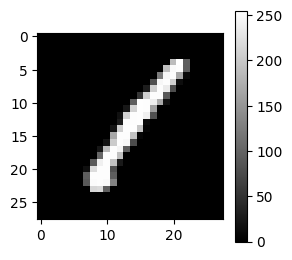

In [12]:
# Visualise the first image in the training set
# Extract the first row of pixel values and reshape to 28x28
first_digit_pixels = features.iloc[0, 0:].values.reshape(28, 28)

# Plot the image
plt.figure(figsize=(3, 3)) 
plt.imshow(first_digit_pixels, cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255:

In [13]:
features = features / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

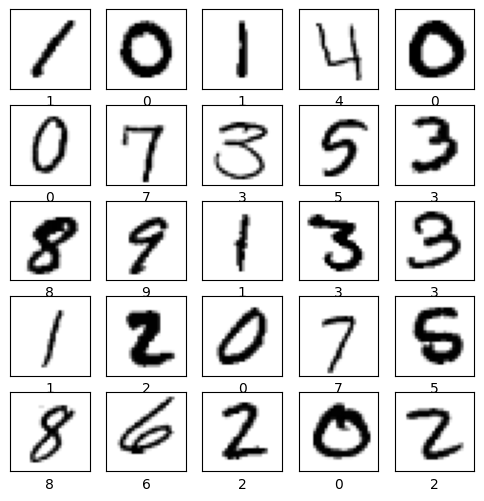

In [14]:
# Reshape and Display the first 25 images from the training set with their labels
plt.figure(figsize=(6,6))
for i in range(25):
    # Extract the image data and label 
    image_data = features.iloc[i, 0:].values.reshape(28, 28) 
    label = target[i]
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_data, cmap=plt.cm.binary)
    plt.xlabel(label)
plt.show()

### **Train and test split**
To evaluate the performance of our model, we need to divide the dataset into training and testing sets. We'll allocate 20% of the data to the test set, which will be used to assess the model after training.

In [15]:
# X refers to features data
# Y refers to target
# 20% to test after the training  
train_images, test_images, train_labels, test_labels = train_test_split(features, target, test_size=0.20, random_state=0) 

# **3. Model development** ✨

 ## **Model arquitechture**
This model architecture is well-suited for image classification tasks like digit recognition. It combines convolutional layers, which are adept at feature extraction from image data, with fully connected layers, which perform the final classification. The use of max pooling layers helps to reduce dimensionality and the risk of overfitting, while the dense layers ensure that the model can learn complex mappings from the input images to the digit labels.

Building the neural network requires configuring the layers of the model, then compiling the model.

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(784,)), 
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),  # Dense layer with 128 neurons
    tf.keras.layers.Dense(10)  # Output layer with 10 neurons (for 10 classes)
])

/Volumes/MacintoshHD/Users/veronicalarroy/Desktop/anaconda3/envs/IH_BCN_DAFT/lib/python3.11/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### **Compile the model**

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

***- Optimizer*** —This is how the model is updated based on the data it sees and its loss function.\
***- Loss function*** —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.\
***- Metrics*** —Used to monitor the training and testing steps. Here, we used accuracy and mse.

In [17]:
model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy', 'mse'])

### **Model summary**
View all the layers of the network using the Keras Model.summary method:

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       200,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,922 (808.29 KB)

 Trainable params: 206,922 (808.29 KB)

 Non-trainable params: 0 (0.00 B)

## **Model training**

Training the neural network model requires the following steps:

1. Feed the training data to the model. Here, the training data is in the features and target arrays.
2. The model learns to associate images and labels.
3. Then, asking the model to make predictions about a test set.
4. Verify that the predictions match the labels from the test array.

### **Feed the model**
To start training, we call the model.fit method—so called because it "fits" the model to the training data. Epoch refers to one complete cycle through the entire training dataset. After an epoch, the model has seen each training sample exactly once.

In [19]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels)) # accuracy is based on training data, val_accuracy is evaluating the test data

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8655 - loss: 0.4298 - mse: 43.5533 - val_accuracy: 0.9749 - val_loss: 0.0817 - val_mse: 51.5995
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9804 - loss: 0.0626 - mse: 63.8319 - val_accuracy: 0.9824 - val_loss: 0.0576 - val_mse: 67.7164
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9880 - loss: 0.0392 - mse: 75.8403 - val_accuracy: 0.9855 - val_loss: 0.0482 - val_mse: 83.0739
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9894 - loss: 0.0320 - mse: 85.8490 - val_accuracy: 0.9868 - val_loss: 0.0428 - val_mse: 87.8692
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9937 - loss: 0.0187 - mse: 104.8065 - val_accuracy: 0.9858 - val_loss: 0.0467 - val_mse: 107.3361
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9955 - loss: 0.0154 - mse: 117.8616 - val_accuracy: 0.9876 - val_loss: 0.0397 - val_mse: 114.8651


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.99 (or 99%) on the training data.

## **Model evalution**

### **Evaluate accuracy**
Now, we compare how the model performs on the test dataset:

In [21]:
test_loss, test_acc, test_mse = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

263/263 - 1s - 5ms/step - accuracy: 0.9888 - loss: 0.0427 - mse: 185.5635

Test accuracy: 0.9888095259666443


The accuracy on the test dataset is slightly lower than the accuracy on the training dataset. This discrepancy indicates overfitting. Overfitting occurs when a machine learning model performs well on the training data but fails to generalize to new, unseen data. Essentially, an overfitted model "memorizes" the noise and specific details of the training data, which leads to a decline in performance when it encounters new inputs.

### **Make predictions**

With the model now trained, we can use it to make predictions on new images. To make these predictions more interpretable, we first attach a softmax layer. This layer converts the model's linear outputs—logits—into probabilities, providing a clearer understanding of the model's confidence in each prediction.


In [22]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [23]:
predictions = probability_model.predict(test_images)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [24]:
predictions[0]

array([1.75510479e-18, 1.33384866e-11, 2.99954086e-14, 9.99999583e-01,
       1.09527817e-12, 3.43886228e-07, 2.26163538e-17, 2.07887640e-09,
       2.59533994e-08, 4.89355214e-12], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different digits. 

In [25]:
# Find the index of the highest probability
predicted_digit = np.argmax(predictions[0])

# Create a one-hot encoded array
one_hot_encoded = np.zeros_like(predictions[0])
one_hot_encoded[predicted_digit] = 1

print(one_hot_encoded)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


Here notice that the label has the highest confidence value:

In [26]:
np.argmax(predictions[0])

3

So, the model is most confident that this image is an digit 3. Examining the test label shows that this classification is correct:

In [27]:
test_labels.values[0]

3

Here the functions to graph the full set of 10 digits predictions:

In [28]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label.iloc[i], img.iloc[i].values.reshape(28, 28) 
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(digits[predicted_label],
                                100*np.max(predictions_array),
                                digits[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label.iloc[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### **Verify predictions**

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.
First, define the functions to graph the full set of 10 class predictions:

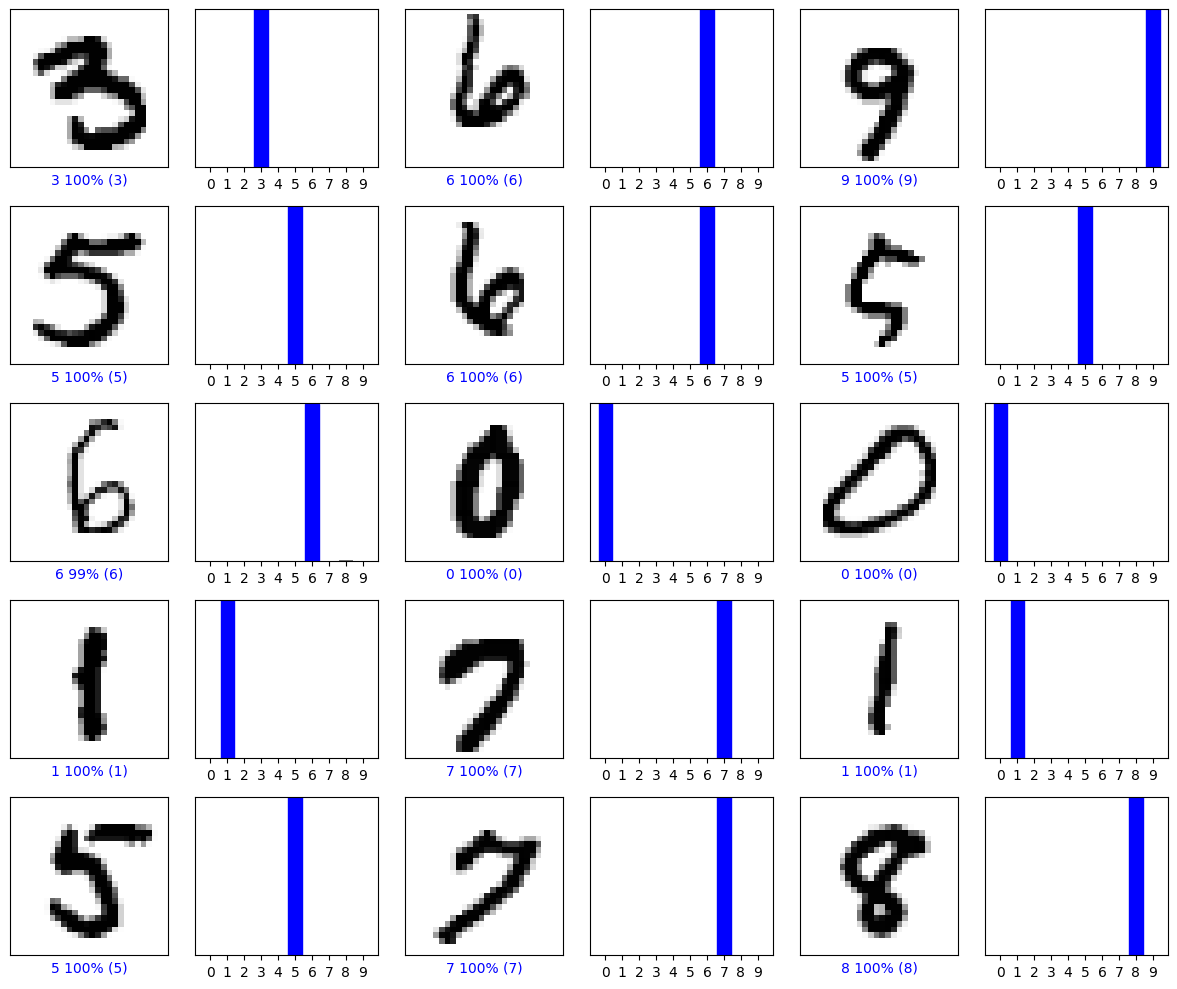

In [32]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## **Use the trained model**
To conclude, let's use the trained model to make a prediction about a single image.

In [33]:
digit_recognizer_test = pd.read_csv('test.csv')
digit_recognizer_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


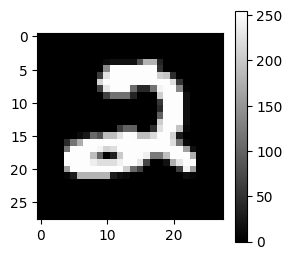

In [37]:
# Visualise the first image in the training set
# Extract the first row of pixel values and reshape to 28x28
img_test = digit_recognizer_test.iloc[0, 0:].values.reshape(28, 28)

# Plot the image
plt.figure(figsize=(3, 3)) 
plt.imshow(img_test, cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [38]:
img_test = digit_recognizer_test.iloc[0, 0:]
img_test

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64

In [39]:
# Add the image to a batch where it's the only member.
img_test = (np.expand_dims(img_test,0))

print(img_test.shape)

(1, 784)


In [40]:
single_prediction = probability_model.predict(img_test)

single_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [42]:
full_prediction = probability_model.predict(digit_recognizer_test)
score = tf.nn.softmax(full_prediction[0])

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
